# Convert `.eit` Files to a Different File Type

### Most of the code was adapted from [EITLabworks/scioPy](https://github.com/EITLabworks/scioPy)

## `.eit` $\rightarrow$ `.npz`

This example script shows how the `.eit` files of the EIT device created with the standard software can be converted into `.npz` files. 

In [2]:
import os
from datetime import datetime
from glob import glob

import matplotlib.pyplot as plt
import numpy as np
from toolbox import Protocol, convert_fulldir_doteit_to_npz

In [3]:
file_path = "../measurements/P06/"

protocol = Protocol(file_path)

../measurements/P06/Participant_P06_protocol.json
{'participant': {'Number': 'P06', 'age': '29', 'gender': 'female', 'leg': 'right'}, 'isokinetic_measurement': {'rotation_velocity': '30 °/s', 'force_levels': '[70 70 40 40 30 30 60 60 80 80 20 20 50 50]'}, 'eit_measurement': {'excitation_frequency': 125000, 'burst_count': 0, 'amplitude': '1 mA', 'frame_rate': 40, 'n_el': 16, 'injection_skip': 5}, 'notes': 'Lever Arm: 31.4 cm'}


In [4]:
convert_fulldir_doteit_to_npz(file_path, protocol)

In [5]:
tmp = np.load("../measurements/P06/eit_npz/setup_00001.npz", allow_pickle=True)
tmp.files

['eit', 'timestamp']

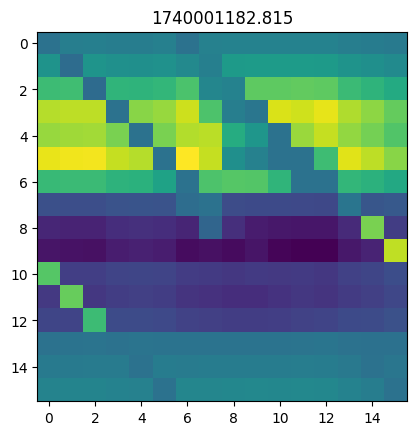

In [6]:
plt.title(tmp["timestamp"])
plt.imshow(tmp["eit"].real)
plt.show()

**Convert all .npz**

In [9]:
for p in range(1, 7):
    file_path = "../measurements/P{0:02d}/".format(p)
    print(file_path)
    protocol = Protocol(file_path)
    convert_fulldir_doteit_to_npz(file_path, protocol)

../measurements/P01/
../measurements/P01/Participant_P01_protocol.json
{'participant': {'Number': 'P01', 'age': '22', 'gender': 'male', 'leg': 'right'}, 'isokinetic_measurement': {'rotation_velocity': '30 °/s', 'force_levels': '[40 40 80 80 70 70 30 30 20 20 60 60 50 50]'}, 'eit_measurement': {'excitation_frequency': 125000, 'burst_count': 0, 'amplitude': '1 mA', 'frame_rate': 40, 'n_el': 16, 'injection_skip': 5}, 'notes': 'Lever Arm:  36.4 cm\n\nforce level was not random , we did again\n70 80 40 30 20 60 50 is correct one'}
../measurements/P02/
../measurements/P02/Participant_P02_protocol.json
{'participant': {'Number': 'P02', 'age': '22', 'gender': 'female', 'leg': 'right'}, 'isokinetic_measurement': {'rotation_velocity': '30 °/s', 'force_levels': '[20 20 60 60 40 40 70 70 30 30 80 80 50 50]'}, 'eit_measurement': {'excitation_frequency': 125000, 'burst_count': 0, 'amplitude': '1 mA', 'frame_rate': 40, 'n_el': 16, 'injection_skip': 5}, 'notes': 'Lever Arm: 29 cm'}
../measurements/P03